In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('Social_Network_Ads.csv')

In [7]:
data.info()
data.Purchased.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


0    257
1    143
Name: Purchased, dtype: int64

In [4]:
features = data.iloc[:,[2,3]].values
label = data.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=10)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model.score(X_train,y_train)

0.640625

In [9]:
model.score(X_test,y_test)

0.65

In [7]:
# For Demo purpose I am going to show ROC and PR curve. However for this example PR curve is the cvalid curve to (since its unbalnced)
#consider 

# ROC Curve Implementation

In [14]:
#plotting the ROC curve for test model
model.predict_proba(X_test)[:,1]

array([0.44417889, 0.44672283, 0.43689639, 0.44513822, 0.46554364,
       0.44269648, 0.45348476, 0.44630623, 0.45195334, 0.44500422,
       0.44678988, 0.44245267, 0.41091817, 0.44267975, 0.45301661,
       0.44586336, 0.44978738, 0.46173954, 0.46919252, 0.43017049,
       0.46032165, 0.46022056, 0.44555461, 0.42298547, 0.43570983,
       0.45140148, 0.44937025, 0.42493029, 0.44836844, 0.45871196,
       0.46339414, 0.45152623, 0.45836799, 0.44896996, 0.42338039,
       0.45750464, 0.43405745, 0.42353649, 0.45115918, 0.45799039,
       0.45088333, 0.4474413 , 0.47321417, 0.4591979 , 0.44992166,
       0.46189124, 0.41905819, 0.45348476, 0.44409518, 0.45697569,
       0.43928125, 0.43156978, 0.44426261, 0.4478581 , 0.44768323,
       0.44497072, 0.43176944, 0.45326626, 0.44347104, 0.40720396,
       0.4523709 , 0.43003039, 0.45171099, 0.42550804, 0.41489654,
       0.43752811, 0.44417889, 0.41258657, 0.47550418, 0.44323672,
       0.44643072, 0.43771885, 0.46445186, 0.45799039, 0.45009

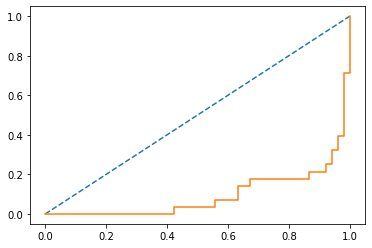

In [16]:
#Plot ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline


#Step1: Extract the prob values for label 1
probabilityValues = model.predict_proba(X_test)[:,1]

#Step2: Calc AUC
auc = roc_auc_score(y_test,probabilityValues)

#Step3: Plot Skill Line
plt.plot([0,1],[0,1], linestyle='--')

#Step4: Plot ROC curve

fpr,tpr,threshold = roc_curve(y_test,probabilityValues)
plt.plot(fpr,tpr)





# PR Curve

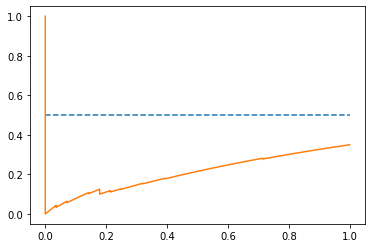

In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = model.predict_proba(X_test)[:,1]

#Step2: Calc AUC
precision,recall,threshold = precision_recall_curve(y_test,probabilityValues)
auc = auc(recall,precision)

#Step3: Plot Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR curve
plt.plot(recall,precision)





In [21]:
#Model2
import warnings
warnings.filterwarnings('ignore')
for i in range(1,201):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("{}--{}--{}".format(test_score,train_score,i))

0.6875--0.63125--3
0.8875--0.790625--4
0.6625--0.6375--5
0.675--0.634375--7
0.675--0.634375--8
0.65--0.640625--10
0.6625--0.6375--11
0.675--0.634375--16
0.7--0.628125--17
0.7--0.628125--21
0.65--0.640625--24
0.6625--0.6375--25
0.8625--0.815625--26
0.675--0.634375--27
0.7--0.628125--28
0.6875--0.63125--29
0.6875--0.63125--31
0.6625--0.6375--37
0.675--0.640625--39
0.7--0.628125--40
0.6625--0.64375--42
0.85--0.790625--46
0.65--0.640625--48
0.675--0.634375--50
0.65--0.640625--51
0.65--0.640625--54
0.65--0.64375--56
0.6625--0.6375--58
0.6875--0.6375--59
0.7--0.628125--60
0.6625--0.6375--62
0.6875--0.63125--63
0.65--0.640625--66
0.65--0.640625--74
0.65--0.640625--75
0.6875--0.63125--76
0.6875--0.63125--80
0.675--0.634375--81
0.7--0.628125--83
0.675--0.634375--84
0.675--0.634375--86
0.65--0.640625--87
0.675--0.634375--90
0.675--0.640625--91
0.7--0.628125--93
0.85--0.834375--94
0.65--0.640625--97
0.7875--0.784375--99
0.675--0.634375--101
0.6625--0.6375--102
0.725--0.621875--103
0.65--0.640625-

In [23]:
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=4)
modelNew = LogisticRegression()
modelNew.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

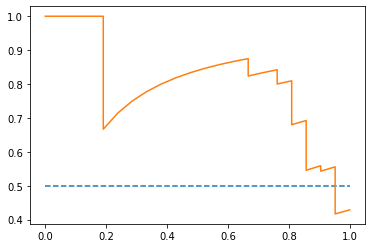

In [24]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = modelNew.predict_proba(X_test)[:,1]

#Step2: Calc AUC
precision,recall,threshold = precision_recall_curve(y_test,probabilityValues)
auc = auc(recall,precision)

#Step3: Plot Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR curve
plt.plot(recall,precision)






# KNN Algorithm Implementation

In [34]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
modelKNN.score(X_train,y_train)


0.86875

In [39]:
modelKNN.score(X_test,y_test)

0.9125

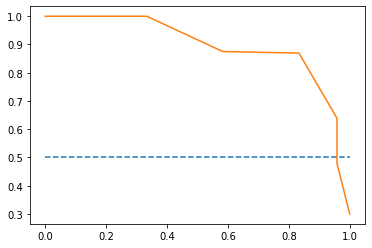

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = modelKNN.predict_proba(X_test)[:,1]

#Step2: Calc AUC
precision,recall,threshold = precision_recall_curve(y_test,probabilityValues)
auc = auc(recall,precision)

#Step3: Plot Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR curve
plt.plot(recall,precision)




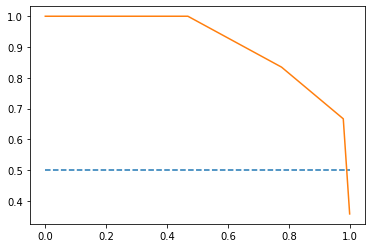

In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

#Step1: Extract the prob values for label 1
probabilityValues = modelKNN.predict_proba(features)[:,1]

#Step2: Calc AUC
precision,recall,threshold = precision_recall_curve(label,probabilityValues)
auc = auc(recall,precision)

#Step3: Plot Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')

#Step4: Plot PR curve
plt.plot(recall,precision)

